# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")


In [3]:
print(api_key)

207fcedd526743c7b11e6aa179e3a20c


In [4]:
# Create a newsapi client
from newsapi import NewsApiClient

In [5]:
newsapi = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [7]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [8]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head()

,text,Compound,Positive,Negative,Neutral
0,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929
1,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.00,0.942
2,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816
3,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.00,1.000
4,"Mark Zuckerberg posted a picture of his two, f...",0.8455,0.217,0.00,0.783


In [9]:
# Create the ethereum sentiment scores DataFrame
sentiments = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(sentiments)
eth.head()

,text,Compound,Positive,Negative,Neutral
0,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.00,0.940
1,Their investors call them disruptive innovator...,-0.4019,0.072,0.15,0.778
2,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.00,0.917
3,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.00,1.000
4,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.00,0.909


In [10]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.00000,20.00000
mean,0.194945,0.077250,0.03805,0.88475
std,0.452044,0.075344,0.05079,0.08099
min,-0.762700,0.000000,0.00000,0.73600
25%,0.000000,0.000000,0.00000,0.82075
50%,0.273000,0.070000,0.00000,0.88650
75%,0.513100,0.140250,0.06800,0.93225
max,0.845500,0.217000,0.18000,1.00000


In [11]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.079965,0.039850,0.015550,0.894600
std,0.275544,0.052982,0.040203,0.221424
min,-0.401900,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.915000
50%,0.000000,0.019000,0.000000,0.952500
75%,0.152575,0.067500,0.000000,1.000000
max,0.817600,0.210000,0.150000,1.000000


### Questions:

**Important note:** The sample answers may vary depending on when this code is running since news may change over time.

Q: Which coin had the highest mean positive score?

A: Ethereum had a slightly higher mean positive score

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score

Q. Which coin had the highest positive score?

A: Bitcoin had the highest Positive score

---

## 2. Natural Language Processing
---
###   Tokenize

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word,
2. Remove punctuation.
3. Remove stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer() 

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens


In [15]:
# Create a new tokens column for Bitcoin
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929,"[week, Tesla, started, accepting, Bitcoin, cur..."
1,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.00,0.942,"[Shares, Square, 6, today, American, fintech, ..."
2,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816,"[Image, Tesla, Tesla, stopped, accepting, bitc..."
3,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.00,1.000,"[Illustration, Alex, Castro, Verge, Cryptocurr..."
4,"Mark Zuckerberg posted a picture of his two, f...",0.8455,0.217,0.00,0.783,"[Mark, Zuckerberg, posted, picture, two, frank..."


In [16]:
# Create a new tokens column for Ethereum
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.00,0.940,"[Vitalik, Buterin, creator, Ethereum, Wednesda..."
1,Their investors call them disruptive innovator...,-0.4019,0.072,0.15,0.778,"[investor, call, disruptive, innovator, Detrac..."
2,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.00,0.917,"[Solana, ’, known, yet, outside, crypto, commu..."
3,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.00,1.000,"[New, York, CNN, Business, Bitcoin, price, con..."
4,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.00,0.909,"[creator, behind, CryptoPunks, one, popular, N..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Elon', 'Musk'), 7),
 (('accepting', 'Bitcoin'), 2),
 (('stopped', 'accepting'), 2),
 (('accepting', 'bitcoin'), 2),
 (('CEO', 'Elon'), 2),
 (('outage', 'morning'), 2),
 (('Last', 'week'), 2),
 (('Musk', 'tweeted'), 2),
 (('char', 'Bitcoin'), 2),
 (('crypto', 'market'), 2),
 (('week', 'Tesla'), 1),
 (('Tesla', 'started'), 1),
 (('started', 'accepting'), 1),
 (('Bitcoin', 'currency'), 1),
 (('currency', 'car'), 1),
 (('car', 'Elon'), 1),
 (('Musk', 'revealed'), 1),
 (('revealed', 'tweet'), 1),
 (('tweet', 'suspend'), 1),
 (('suspend', 'effort'), 1)]

In [19]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'Reuters'), 4),
 (('Reuters', 'Staff'), 4),
 (('representation', 'virtual'), 4),
 (('virtual', 'currency'), 4),
 (('currency', 'Ethereum'), 4),
 (('Ethereum', 'seen'), 4),
 (('seen', 'front'), 4),
 (('front', 'stock'), 4),
 (('stock', 'graph'), 4),
 (('graph', 'illustration'), 4),
 (('illustration', 'taken'), 4),
 (('taken', 'February'), 4),
 (('February', '19'), 4),
 (('19', '2021'), 4),
 (('2021', 'REUTERS/Dado'), 4),
 (('ether', 'hit'), 3),
 (('hit', 'record'), 3),
 (('record', 'high'), 3),
 (('digital', 'currency'), 3),
 (('Vitalik', 'Buterin'), 2)]

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Bitcoin', 9),
 ('Musk', 9),
 ('Tesla', 7),
 ('Elon', 7),
 ('crypto', 6),
 ('week', 5),
 ('company', 5),
 ('bitcoin', 5),
 ('cryptocurrency', 5)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 19),
 ('Ethereum', 9),
 ('Reuters', 7),
 ('currency', 7),
 ('stock', 5),
 ('project', 4),
 ('Staff', 4),
 ('representation', 4),
 ('virtual', 4),
 ('seen', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [24]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

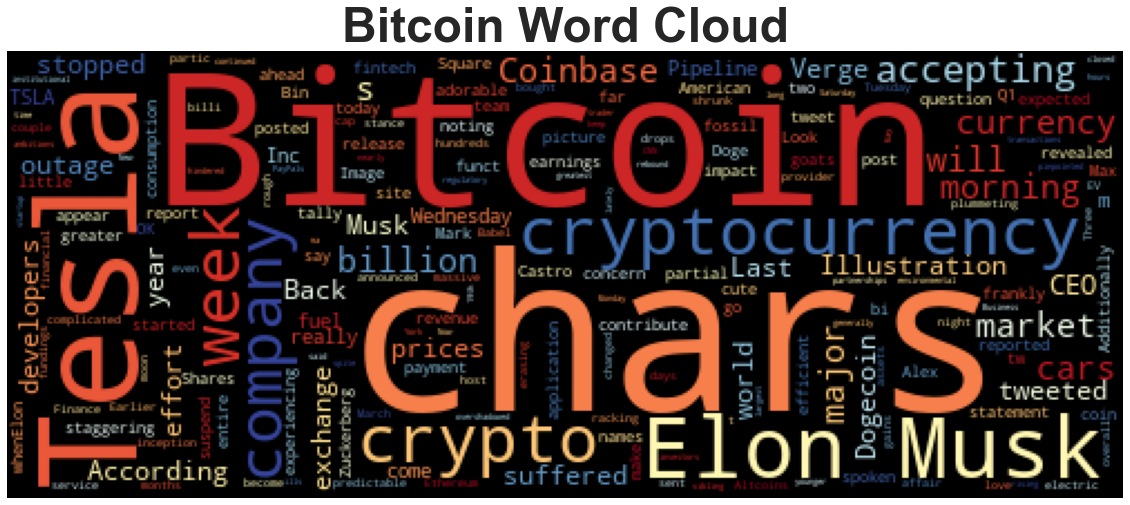

In [25]:
wordcloud(btc.text.str.cat(), title="Bitcoin Word Cloud")

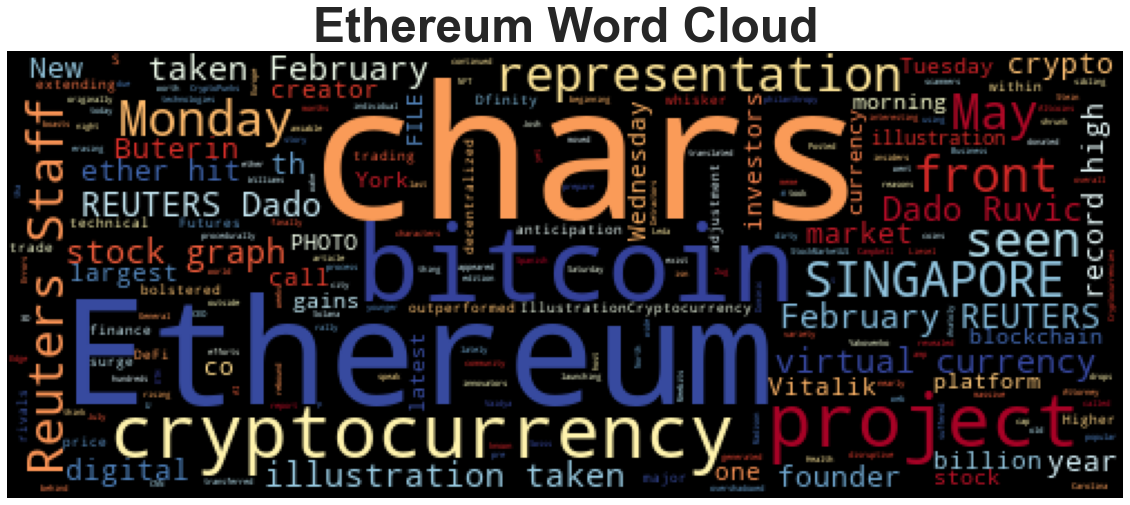

In [26]:
wordcloud(eth.text.str.cat(), title="Ethereum Word Cloud")

---

## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Download the language model for SpaCy if needed
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---

## Bitcoin NER

In [30]:
# Concatenate all of the bitcoin text together
all_btc_text = btc.text.str.cat()
all_btc_text

'Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars]Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars]Image: Tesla\r\n\n \n\n Tesla has stopped accepting bitcoin as payment for its cars out of concern that it will contribute to greater consumption of fossil fuels, according to a statement CEO Elon Musk tw… [+853 chars]Illustration by Alex Castro / The Verge\r\n\n \n\n Cryptocurrency exchange Coinbase is experiencing a “partial” outage this morning for its entire site and application. Additionally, both Coinbase and Bin… [+1307 chars]Mark Zuckerberg posted a picture of his two, frankly adorable, goats noting their names are Max and Bitcoin.\r\nAnd to that I say: OK t

In [31]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [32]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [33]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Just weeks DATE
Tesla ORG
Bitcoin PERSON
Elon Musk PERSON
Square FAC
more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
Tesla ORG
Elon Musk PERSON
Alex Castro PERSON
The Verge

 

 Cryptocurrency ORG
Coinbase PERSON
this morning TIME
Coinbase PERSON
Bin PERSON
Zuckerberg PERSON
two CARDINAL
Max PERSON
Bitcoin PERSON
+1482 chars]Last week DATE
Musk PERSON
Dogecoin GPE
Elon Musk PERSON
March DATE
Musk PERSON
Tesla PERSON
Earlier this year DATE
EV ORG
1.5 MONEY
Elon Musk PERSON
Bitcoin PERSON
Bitcoin PERSON
Ethereum ORG
Altcoins PERSON
Tuesday night TIME
Wednesday DATE
morning TIME
months DATE
hundreds of billions MONEY
Babel Finance ORG
Monday DATE
hours-long TIME
this morning TIME
May 19th DATE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
PayPals ORG
Wednesday DATE
Jose Fernandez da Pontethe PERSON
more than 5,500 miles QUANTITY
the United States GPE
Photo PERSON
Michele Doying PERSON
Verge ORG
Iran GPE
Last week DATE
Trump ORG
This wee

---

### Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together
all_eth_text = eth.text.str.cat()
all_eth_text

'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and meme coins worth $1.5 billion in one of the largest-ever individual philanthropy efforts.\r\nButerin transferred 500 ETH and … [+1667 chars]Their investors call them disruptive innovators. Detractors like North Carolina Attorney General Josh Stein call them dirty scammers. But Leda Health co-founders Madison Campbell and Liesel Vaidya th… [+8679 chars]Solana isn’t known yet outside of the crypto community. But insiders think the blockchain platform is interesting for a wide variety of reasons, beginning with its amiable founder, Anatoly Yakovenko,… [+7156 chars]New York (CNN Business)Bitcoin prices continued their rebound Saturday, rising about 6% to nearly $58,000. But the world\'s largest cryptocurrency has been overshadowed lately by its younger sibling, … [+866 chars]The creators behind CryptoPunks, one of the most popular NFT projects on the web, just revealed their latest project called Meebits. The proj

In [35]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [36]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [37]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

Vitalik Buterin PERSON
Ethereum ORG
Wednesday DATE
Ethereum ORG
$1.5 billion MONEY
Buterin PERSON
500 CARDINAL
ETH ORG
North Carolina GPE
Josh Stein PERSON
Madison Campbell PERSON
Liesel Vaidya PERSON
Anatoly Yakovenko PERSON
chars]New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
CryptoPunks ORG
one CARDINAL
NFT ORG
Meebits PRODUCT
20,000 CARDINAL
3D ORG
Ethereum ORG
Altcoins PERSON
Tuesday night TIME
Wednesday DATE
morning TIME
months DATE
hundreds of billions MONEY
Reuters ORG
February 19, 2021 DATE
SINGAPORE GPE
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
Dfinity ORG
July 2018 DATE
Swiss NORP
Dominic Williams PERSON
StockMarketUS Stock Futures Edge Higher ORG
Monday DATE
U.S. GPE
Monday DATE
Spanish NORP
AI ORG
Cryptocurrencies ORG
today DATE
Vitalik Buterin PERSON
27-year-old DATE
Reuters ORG
SINGAPORE GPE
May 3 DATE
Reuters ORG
Monday DATE
3,000 MONEY
last weeks DATE
Europe LOC
Dow Jones Indices ORG
February 19, 2021 DATE
Dado Ruvic/